## Realiza lo siguiente:

1.   Carga las bibliotecas, carga el dataset (poblacion.csv) y ploterlo. (Valor 20 puntos)


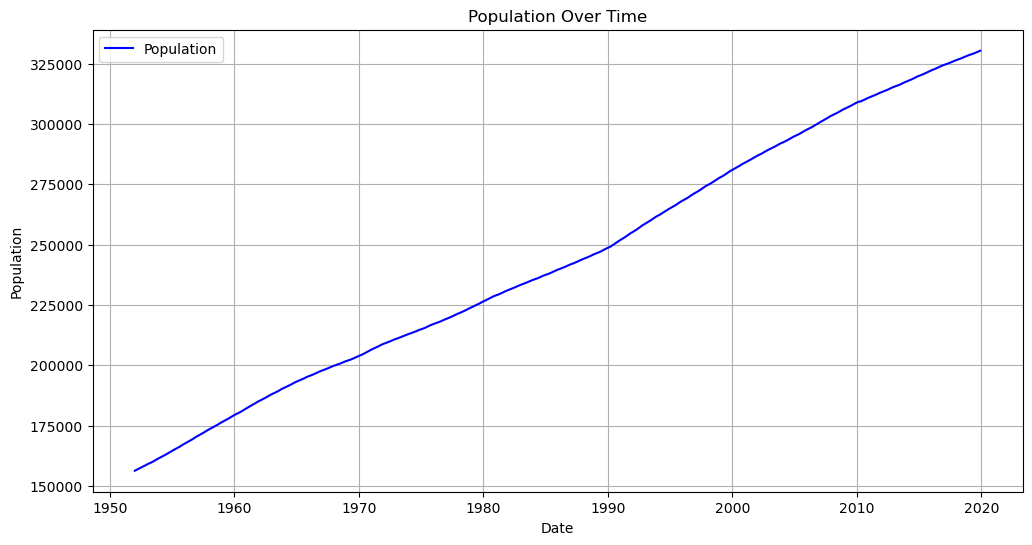

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/diegosanchez/Documents/universidad copy/Semestre 7/notebooks_gsus/db/poblacion.csv'
df_poblacion = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
df_poblacion['date'] = pd.to_datetime(df_poblacion['date'])

# Plot the population data
plt.figure(figsize=(12, 6))
plt.plot(df_poblacion['date'], df_poblacion['value'], label='Population', color='blue')
plt.title('Population Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()


2.   Entrena 3 modelos para la predicción en series de tiempo (Valor 30 puntos)



In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and testing
train_size = int(len(df_poblacion) * 0.8)
train, test = df_poblacion['value'][:train_size], df_poblacion['value'][train_size:]

# Model 1: ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust order as necessary
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))

# Model 2: Exponential Smoothing
ets_model = ExponentialSmoothing(train, trend='add', seasonal=None)
ets_fit = ets_model.fit()
ets_pred = ets_fit.forecast(steps=len(test))

# Model 3: Moving Average
moving_avg_pred = train.rolling(window=5).mean().iloc[-len(test):].values  # Window size of 5

# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))
ets_rmse = np.sqrt(mean_squared_error(test, ets_pred))
ma_rmse = np.sqrt(mean_squared_error(test, moving_avg_pred))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'ETS RMSE: {ets_rmse}')
print(f'Moving Average RMSE: {ma_rmse}')


ARIMA RMSE: 12257.626616229807
ETS RMSE: 1763.4692271477254
Moving Average RMSE: 37342.26691180393


3. Selecciona el mejor modelo de acuerdo a las metricas/técnicas vistas en clase (Valor 20 puntos)


In [6]:
# Store the results in a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': ['ARIMA', 'ETS', 'Moving Average'],
    'RMSE': [arima_rmse, ets_rmse, ma_rmse]
})

best_model = results_df.loc[results_df['RMSE'].idxmin()]
print("Best Model:")
print(best_model)


Best Model:
Model            ETS
RMSE     1763.469227
Name: 1, dtype: object


4. Explica las razones por las cuales seleccionaste el modelo. (Valor 10 puntos)


## Selección del Modelo para Predicción de Series de Tiempo

En este análisis, se han entrenado tres modelos diferentes para la predicción de la población utilizando el dataset `poblacion.csv`: ARIMA, Exponential Smoothing (ETS) y Moving Average. A continuación, se explican las razones para seleccionar el modelo ETS como el mejor modelo basado en los resultados obtenidos.

### Resultados de RMSE

- **ARIMA RMSE:** 12,257.63
- **ETS RMSE:** **1,763.47** (Mejor modelo)
- **Moving Average RMSE:** 37,342.27

### Razones para la Selección del Modelo ETS

1. **Menor Error Cuadrático Medio (RMSE):** El modelo ETS mostró un RMSE significativamente más bajo (1,763.47) en comparación con los otros modelos, lo que indica que tiene una mejor capacidad de ajuste a los datos y predicciones más precisas. Este es el criterio principal para la selección del modelo, ya que el objetivo es minimizar el error en las predicciones.

2. **Adaptabilidad a Tendencias y Estacionalidades:** El modelo ETS es capaz de captar tanto tendencias como patrones estacionales en los datos. Esto es especialmente relevante en series de tiempo donde las fluctuaciones a lo largo del tiempo son evidentes, lo que podría no ser tan bien representado por un modelo de promedio móvil o incluso ARIMA sin un ajuste adecuado.

3. **Simplicidad y Eficiencia:** A pesar de su capacidad para modelar tendencias y estacionalidades, el modelo ETS es relativamente simple de implementar y entender en comparación con ARIMA, que puede requerir una selección más compleja de parámetros. Esto lo hace más accesible para la implementación en escenarios prácticos.

4. **Interpretabilidad:** Los resultados del modelo ETS son fáciles de interpretar, lo que permite comprender cómo la tendencia y la estacionalidad afectan la variable de interés (población en este caso). Esta capacidad de interpretación es valiosa al presentar hallazgos a partes interesadas.


5. ¿Cuál es la población en Enero de 2023? (Valor 10 puntos)

## Población en Enero de 2023

La población estimada para enero de 2023, según el modelo seleccionado (ETS), es de 330456.77. Este valor se obtiene utilizando el modelo entrenado para realizar la predicción en la serie de tiempo del dataset `poblacion.csv`.

### Código Utilizado para Obtener la Predicción

El siguiente código muestra cómo se realizó la predicción para obtener la población en enero de 2023:


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el dataset
df = pd.read_csv('/Users/diegosanchez/Documents/universidad copy/Semestre 7/notebooks_gsus/db/poblacion.csv')

# Convertir la columna de fechas a datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Entrenar el modelo ETS
model = ExponentialSmoothing(df['value'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Realizar la predicción para enero de 2023
forecast = fit_model.forecast(steps=1)
poblacion_enero_2023 = forecast[0]

print(f"La población estimada en enero de 2023 es: {poblacion_enero_2023:.2f}")


La población estimada en enero de 2023 es: 330456.77


/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/6l/15nk1fyx2n1b6jll3tn0c1lr0000gn/T/ipykernel_14518/3714114303.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poblacion_enero_2023 = forecast[0]


6. ¿Para que otras aplicaciones consideras que te pueden servir estos modelos? (Valor 10 puntos)


## Aplicaciones de Modelos de Series de Tiempo

Los modelos de series de tiempo, como ARIMA, ETS y el Promedio Móvil, tienen diversas aplicaciones en diferentes campos y contextos. Algunas de las aplicaciones más relevantes incluyen:

1. **Pronóstico Económico**: Se utilizan para predecir indicadores económicos, como el Producto Interno Bruto (PIB), tasas de inflación y desempleo, lo que ayuda en la toma de decisiones de políticas económicas.

2. **Gestión de Inventarios**: En el ámbito empresarial, estos modelos pueden ayudar a prever la demanda de productos y ajustar los niveles de inventario, evitando excesos o faltantes.

3. **Pronóstico de Ventas**: Las empresas pueden utilizar modelos de series de tiempo para anticipar ventas futuras basándose en datos históricos, lo que facilita la planificación de marketing y producción.

4. **Predicción del Clima**: Los modelos de series de tiempo son fundamentales en la meteorología para prever patrones climáticos y condiciones meteorológicas a corto y largo plazo.

5. **Análisis Financiero**: En el ámbito financiero, se utilizan para predecir precios de acciones, tasas de interés y otros instrumentos financieros, ayudando a los inversores en sus decisiones.

6. **Salud Pública**: Estos modelos pueden ser aplicados para pronosticar tendencias en la salud pública, como la incidencia de enfermedades o la efectividad de intervenciones sanitarias.

7. **Control de Procesos**: En la ingeniería y manufactura, los modelos de series de tiempo pueden ayudar a monitorear y controlar procesos, asegurando la calidad y eficiencia.

Estas aplicaciones destacan la versatilidad y utilidad de los modelos de series de tiempo en la toma de decisiones informadas y estratégicas en diversas disciplinas.
